In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class NN:
   
    def __init__(self, nn):
        self.net = {'nn': nn, 'M': len(nn) - 1, 'layers': nn[1:]}
        self.net['w'], self.net['b'], self.net['N'] = self.create_w()

    def create_w(self):
        w = []
        b = []
        weights = 0
        for i in range(self.net['M']):
            w.append(np.random.rand(self.net['nn'][i+1], self.net['nn'][i]) - 0.5)
            b.append(np.random.rand(self.net['nn'][i+1]))
            weights += self.net['nn'][i+1] * (self.net['nn'][i] + 1)

        return w, b, weights

    @staticmethod
    def sigmoid(x):
        return 1.0/(1 + np.exp(-x))

    def feed_forward(self, x):
        ret = x
        for i in range(len(self.net['w'])):
            ret = np.dot(ret, self.net['w'][i].transpose())
            for j in range(ret.shape[0]):
                ret[j][:] += self.net['b'][i]
            ret = NN.sigmoid(ret)
        return ret

    @staticmethod
    def map_weights(w, b):
        w_to_layer = {}
        counter = 0
        for layer in range(len(w)):
            for i in range(w[layer].shape[0]):
                w_to_layer[counter] = (layer, i, -1)
                counter += 1
                for j in range(w[layer].shape[1]):
                    w_to_layer[counter] = (layer, i, j)
                    counter += 1
        return  w_to_layer   
        
    def train_levenberg(self, x, y, epochs=100, u=0.01):
        print(len(x))
        Errors=[]
        Number_patterns = len(x)
        output_neurons = self.net['nn'][len(self.net['nn']) - 1]
        w_to_layer = NN.map_weights(self.net['w'], self.net['b'])
        for epoch in range(epochs):
            prediction = self.feed_forward(x)
            e = NN.calculate_e(Number_patterns, output_neurons, y, prediction)
            error = 0.5 * np.sum(np.square(e))
            Errors.append(error)
            j = self.create_j(x, y, e, self.net['N'],w_to_layer, Number_patterns, output_neurons)
           
            H=np.dot(j.transpose(), j) + u*np.identity(j.shape[1])
            tmp = np.dot(np.linalg.pinv(H), np.dot(j.transpose(), e.transpose()))
            for i in range(len(tmp)):
                tup = w_to_layer[i]
                if tup[2] == -1:
                    self.net['b'][tup[0]][tup[1]] -= tmp[i]
                else:
                    self.net['w'][tup[0]][tup[1]][tup[2]] -= tmp[i]
        
        plt.plot(Errors)
        plt.ylabel('error')
        plt.xlabel('iterations (per tens)')
        plt.show()
        return self.net['w'], self.net['b']

    @staticmethod
    def calculate_e(patterns, output_neurons, y, prediction):
        e = np.zeros([1, patterns*output_neurons])
        counter = 0
        for i in range(patterns):
            for j in range(output_neurons):
                e[0][counter] = y[i][j] - prediction[i][j]
                counter += 1

        return e

    def create_j(self, x, y, e, weights,w_to_layer, patterns, output_neurons):
        delta_w = 0.001
        j = np.zeros([e.shape[1], weights])
        original_e = NN.calculate_e(patterns, output_neurons, y, self.feed_forward(x)).transpose()

        for i in range(weights):
            top = w_to_layer[i]
            if top[2] == -1:
                self.net['b'][top[0]][top[1]] += delta_w
            else:
                self.net['w'][top[0]][top[1]][top[2]] += delta_w

            predict_e = NN.calculate_e(patterns, output_neurons, y, self.feed_forward(x)).transpose()
            subt = np.subtract(predict_e, original_e)
            for row in range(j.shape[0]):
                j[row][i] += subt[row]

            if top[2] == -1:
                self.net['b'][top[0]][top[1]] -= delta_w
            else:
                self.net['w'][top[0]][top[1]][top[2]] -= delta_w
                
        return j

    def predict(self, x):
        predict = self.feed_forward(x)
        for i in range(predict.shape[0]):
            for j in range(predict.shape[1]):
                if predict[i][j] >= 0.5:
                    predict[i][j] = 1
                else:
                    predict[i][j] = 0
        return predict

4


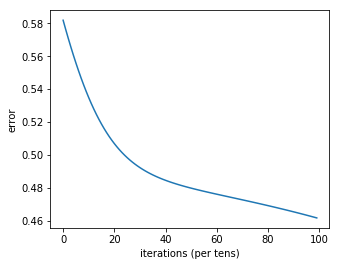

Pridect
[[0.]]
[[1.]]
[[1.]]
[[0.]]


In [29]:
nn = NN([3,2,1])
nn.train_levenberg([[0,0,0],[0,1,0],[1,1,0],[1,0,0]], [[0], [1], [1],[0]])
print("Pridect")
print(nn.predict([[0,0,0]]))
print(nn.predict([[0,1,0]]))
print(nn.predict([[1,1,0]]))
print(nn.predict([[1,0,0]]))    